In [ ]:
#https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/

In [ ]:
#Remove outliers for everything except for binary column
#Balance

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

df = pd.read_csv('/Users/sherryzhang/Downloads/NNFinal_Balanced_Data.csv')  # Change the path to your dataset
df.head()

,AGEP,ANC1P,CIT,DIS,SCHL,ESR,HICOV,HISP,PINCP,OCCP,MAR,MIG,MIL,RAC1P,POBP,SEX,poverty_status
0,51,999,1,1,17.0,6.0,1,1,12500.0,9645.0,2,1.0,4.0,1,1,1,1
1,49,50,1,1,19.0,6.0,2,1,5000.0,6230.0,3,3.0,2.0,1,1,1,1
2,31,939,1,2,17.0,6.0,2,1,12300.0,4020.0,5,3.0,4.0,2,1,1,1
3,21,903,1,2,19.0,6.0,1,1,2400.0,9130.0,5,1.0,4.0,2,48,1,1
4,20,22,1,1,10.0,1.0,1,1,8640.0,9620.0,5,3.0,4.0,1,21,1,1


In [3]:
train_df = df.sample(frac=0.6, random_state=4)

temp_df = df.drop(train_df.index)
val_df = temp_df.sample(frac=0.5, random_state=4)
test_df = temp_df.drop(val_df.index)

In [4]:
max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range_val = max_val - min_val

train_df = (train_df - min_val) / range_val
val_df = (val_df - min_val) / range_val
test_df = (test_df - min_val) / range_val

In [5]:
train_df

,AGEP,ANC1P,CIT,DIS,SCHL,ESR,HICOV,HISP,PINCP,OCCP,MAR,MIG,MIL,RAC1P,POBP,SEX,poverty_status
341179,0.063291,0.222445,1.0,1.0,0.652174,1.0,1.0,0.304348,0.006790,0.969728,1.00,1.0,1.0,1.000,0.566004,1.0,1.0
314849,0.177215,0.251503,0.5,0.0,0.869565,0.0,1.0,0.000000,0.007518,0.362462,1.00,1.0,1.0,0.875,0.652803,1.0,1.0
487245,0.632911,0.920842,0.0,1.0,0.826087,1.0,0.0,0.000000,0.028131,0.578204,0.00,0.0,1.0,0.250,0.081374,1.0,0.0
373448,0.278481,0.209419,1.0,0.0,0.869565,0.0,0.0,0.043478,0.009943,0.503532,0.75,0.0,1.0,0.000,0.546112,1.0,1.0
551863,0.177215,0.209419,0.0,1.0,0.652174,0.0,0.0,0.043478,0.042076,0.072149,0.00,0.0,1.0,0.000,0.009042,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704540,0.379747,0.939880,0.0,1.0,0.869565,1.0,0.0,0.000000,0.015581,0.030272,0.50,0.0,1.0,0.000,0.068716,0.0,0.0
502884,0.405063,0.902806,0.0,1.0,0.739130,0.0,0.0,0.000000,0.020250,0.972250,0.50,0.0,1.0,0.125,0.009042,0.0,0.0
634514,0.341772,0.996994,0.0,1.0,0.869565,0.0,0.0,0.000000,0.022069,0.527750,0.00,0.0,1.0,0.000,0.086799,1.0,0.0
27638,0.088608,0.209419,0.0,1.0,0.782609,0.0,1.0,0.043478,0.012974,0.920283,1.00,0.0,1.0,0.875,0.009042,0.0,1.0


[15]


(array([83365.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 83367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

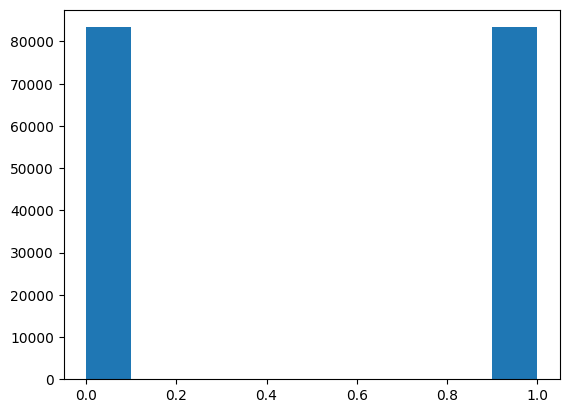

In [6]:
X_train = train_df.drop(['poverty_status', 'PINCP'], axis=1)
X_val = val_df.drop(['poverty_status', 'PINCP'], axis=1)
X_test = test_df.drop(['poverty_status', 'PINCP'], axis=1)
y_train = train_df['poverty_status']
y_val = val_df['poverty_status']
y_test = test_df['poverty_status']

input_shape = [X_train.shape[1]]
print(input_shape)

plt.hist(y_val)

In [7]:
#remove droupout layers

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU

input_shape = (X_train.shape[1],)

model = Sequential([
    
    Dense(1024, input_shape=input_shape, activation='relu'), # block 1
    Dense(512, activation='relu'),
    Dropout(0.1),

    
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.1), # block 2

    
    Dense(64, activation='relu'),  # block 3
    #BatchNormalization(),
    #Dropout(0.1),
    Dense(32, activation='relu'),
    #Dropout(0.1),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 1024)           │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 798,081 (3.04 MB)

 Trainable params: 798,081 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from keras.optimizers import SGD, Adam
model.compile(optimizer=SGD(learning_rate=0.02),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [126]:
filepath = 'bestmodelv1.keras'
earlystopping=EarlyStopping(monitor='val_loss',
                           mode='min',
                           patience=15,
                           verbose=1)

checkpoint=ModelCheckpoint(filepath,monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list=[checkpoint, earlystopping]

In [127]:
# from keras.optimizers import SGD, Adam
# model.compile(optimizer=Adam(learning_rate=0.01),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [128]:
history = model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=256,
                    callbacks=callback_list)

Epoch 1/100
1950/1954 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 0.6026
Epoch 1: val_loss improved from inf to 0.47276, saving model to bestmodelv1.keras
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6987 - loss: 0.6024 - val_accuracy: 0.7806 - val_loss: 0.4728
Epoch 2/100
1947/1954 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7822 - loss: 0.4713
Epoch 2: val_loss improved from 0.47276 to 0.45200, saving model to bestmodelv1.keras
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7822 - loss: 0.4713 - val_accuracy: 0.7903 - val_loss: 0.4520
Epoch 3/100
1951/1954 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.4589
Epoch 3: val_loss improved from 0.45200 to 0.44580, saving model to bestmodelv1.keras
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7875 - loss: 0.4589 - val_accuracy: 0.7952 - val_loss: 0.4458
Epoch 4/100
1947/1954 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7922 - loss: 0.4525
Epoch 4: val_loss improved fro

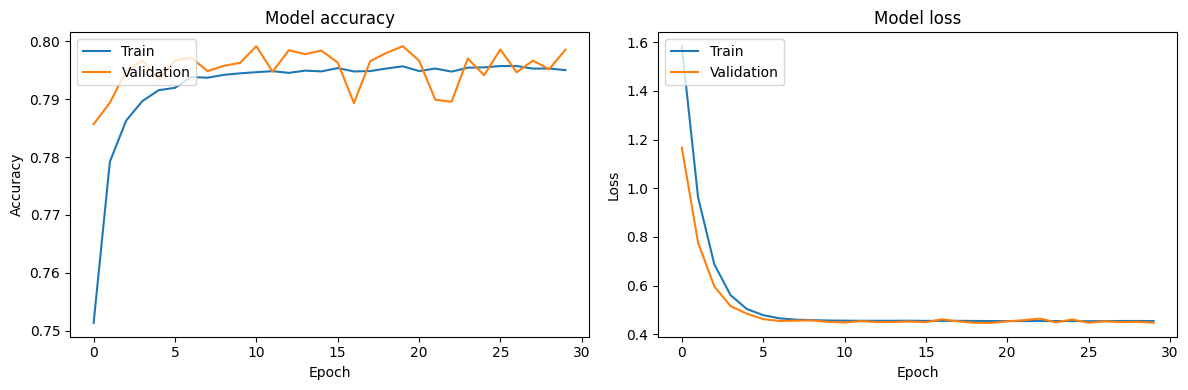

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [156]:
# Evaluate on training set
y_pred_prob_train = model.predict(X_train)
y_pred_train = np.where(y_pred_prob_train > 0.5, 1, 0)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, zero_division=1)
recall_train = recall_score(y_train, y_pred_train, zero_division=1)
f1_train = f1_score(y_train, y_pred_train, zero_division=1)

print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Training Precision: {precision_train:.4f}')
print(f'Training Recall: {recall_train:.4f}')
print(f'Training F1 Score: {f1_train:.4f}')

15632/15632 ━━━━━━━━━━━━━━━━━━━━ 3s 190us/step
Training Accuracy: 0.7873
Training Precision: 0.8221
Training Recall: 0.7341
Training F1 Score: 0.7756


In [157]:
y_pred_prob_test = model.predict(X_test)
y_pred_test = np.where(y_pred_prob_test > 0.5, 1, 0)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, zero_division=1)
recall_test = recall_score(y_test, y_pred_test, zero_division=1)
f1_test = f1_score(y_test, y_pred_test, zero_division=1)

print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

5211/5211 ━━━━━━━━━━━━━━━━━━━━ 1s 241us/step
Test Accuracy: 0.7873
Test Precision: 0.8184
Test Recall: 0.7359
Test F1 Score: 0.7750


In [ ]:
#Feature Importance

   Feature  Importance
0     AGEP    2.008752
5      ESR    1.485038
4     SCHL    1.096215
11     MIL    0.825571
8     OCCP    0.642356
9      MAR    0.570535
6    HICOV    0.477388
14     SEX    0.373110
2      CIT    0.343759
3      DIS    0.306821
13    POBP    0.238322
10     MIG    0.216785
12   RAC1P    0.196971
1    ANC1P    0.169122
7     HISP    0.151459


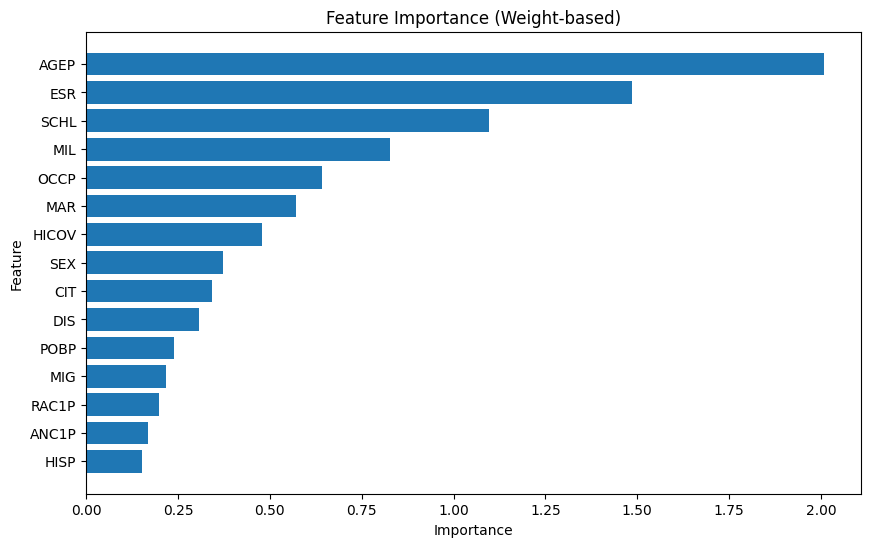

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Assuming your model is already trained and named `model`
# And you have input data `X_train` which is a pandas DataFrame of training data

# Calculate feature importance using weight-based method
weights = model.get_weights()

# Calculate feature importance as the sum of absolute weights for each feature in the first layer
feature_importance_weights = np.sum(np.abs(weights[0]), axis=1)

# Create a DataFrame for visualization
feature_names = X_train.columns.tolist()
importance_df_weights = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_weights})

# Sort and print the feature importance
importance_df_weights = importance_df_weights.sort_values(by='Importance', ascending=False)
print(importance_df_weights)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_weights['Feature'], importance_df_weights['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Weight-based)')
plt.gca().invert_yaxis()
plt.show()